# Importing Packages

In [1]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
## ML Algorithms ##
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Data Visualization

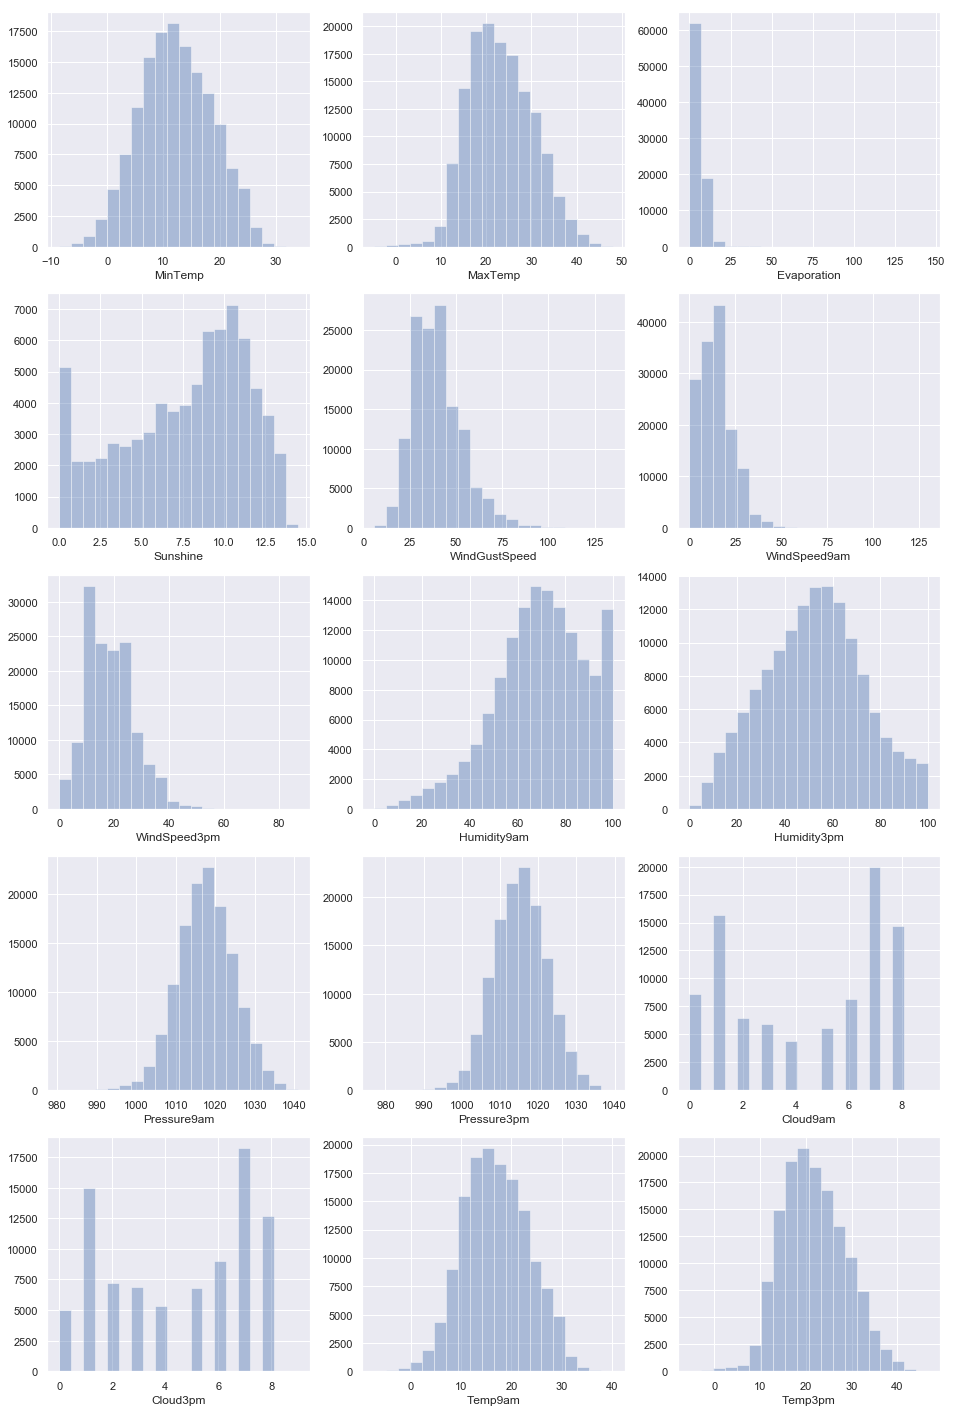

In [9]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);

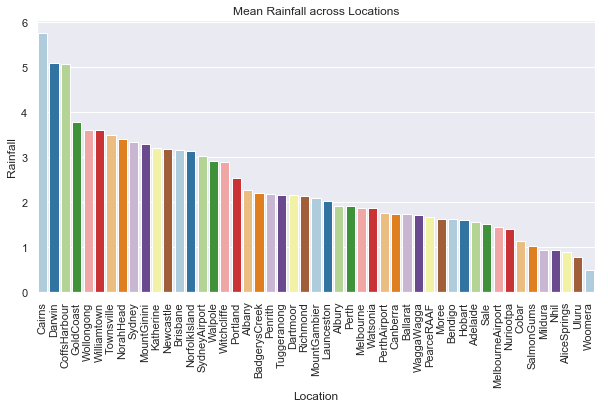

In [10]:
RF_loc = df.groupby('Location')["Rainfall"].mean().sort_values(ascending = False)
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.barplot(x = RF_loc.index, y = RF_loc,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall across Locations");


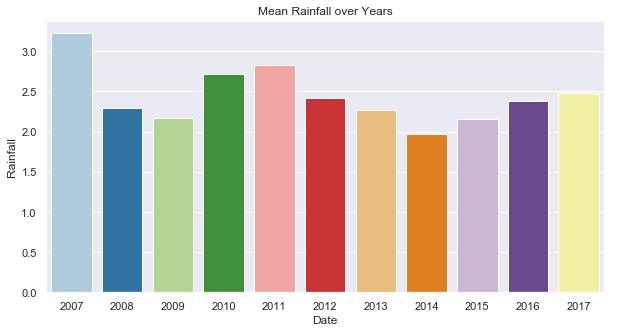

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = RF_year.index, y = RF_year, 
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall over Years");

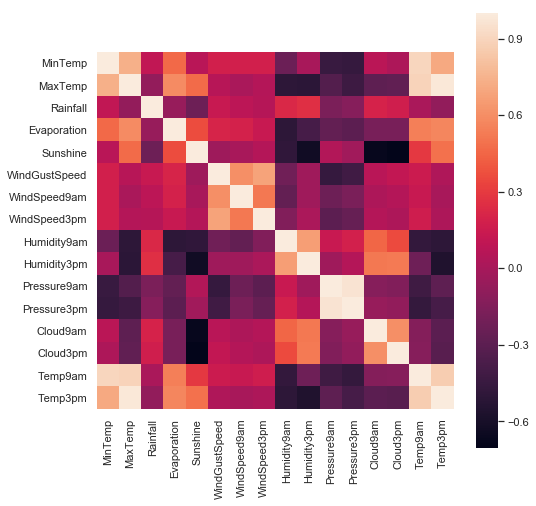

In [12]:
corrmatrix = df.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(corrmatrix, vmax = 1.0, square = True)
plt.show()

# Feature Selection

In [13]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [14]:
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
       ...,
       ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
       ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
       ['Uluru', 14.9, nan, ..., 15.0, 20.9, 'No']], dtype=object)

In [15]:
Y

array(['No', 'No', 'No', ..., 'No', 'No', nan], dtype=object)

In [16]:
Y=Y.reshape(-1,1)
Y

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       [nan]], dtype=object)

# Dealing with Missing Values

In [17]:
from sklearn.impute import SimpleImputer
# Fill the missing values with Mode
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

In [18]:
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
       ...,
       ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
       ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
       ['Uluru', 14.9, 20.0, ..., 15.0, 20.9, 'No']], dtype=object)

In [19]:
Y

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

# Encoding Dataset

In [20]:
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y = le6.fit_transform(Y)

In [21]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [22]:
print(Y)

[0 0 0 ... 0 0 0]


# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:
X

array([[-1.53166617,  0.19132753, -0.04135977, ..., -0.01407077,
         0.02310362, -0.52979545],
       [-1.53166617, -0.75105231,  0.26874452, ...,  0.03244663,
         0.387799  , -0.52979545],
       [-1.53166617,  0.11279588,  0.35331842, ...,  0.62166712,
         0.22733303, -0.52979545],
       ...,
       [ 1.20928479, -1.06517892,  0.52246622, ..., -0.69632607,
         0.65037966, -0.52979545],
       [ 1.20928479, -0.68822699,  0.53656187, ..., -0.29317521,
         0.63579185, -0.52979545],
       [ 1.20928479,  0.42692249, -0.45013361, ..., -0.30868102,
        -0.10818671, -0.52979545]])

In [25]:
Y

array([0, 0, 0, ..., 0, 0, 0])

# Splitting Dataset into Training set and Test set

### Dividing the Training and Testing Data in 80:20

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
X_train

array([[ 0.22535368,  1.03946939,  0.07140543, ...,  0.68369032,
         0.08145488, -0.52979545],
       [ 1.42012717, -0.45263203,  0.11369237, ..., -0.41722163,
         0.22733303, -0.52979545],
       [ 0.50647685, -0.20133073, -0.14002932, ..., -0.06058818,
        -0.02065982,  1.88752093],
       ...,
       [ 1.0687232 ,  0.75675544,  0.93124006, ...,  1.10234698,
         1.07342629, -0.52979545],
       [ 0.57675765, -0.04426743, -0.16822062, ...,  0.01694083,
        -0.28324049,  1.88752093],
       [ 1.63096955, -0.0285611 , -0.91529006, ..., -0.35519842,
        -0.76463838, -0.52979545]])

In [28]:
Y_train

array([1, 0, 0, ..., 0, 0, 0])

# Training Models

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()  
regressor_lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred_lr = regressor_lr.predict(X_test)

In [31]:
y_pred_lr

array([0.28741949, 0.26368635, 0.23270103, ..., 0.50457147, 0.30760933,
       0.00633319])

In [32]:
y_pred_lr = y_pred_lr.astype(int)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(Y_test, y_pred_lr)

In [34]:
print(accuracy_lr)

0.783514368211192


## Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
regressor_la = Lasso()
regressor_la.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
y_pred_la =regressor_la.predict(X_test)

In [37]:
y_pred_la = y_pred_la.astype(int)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_la = accuracy_score(Y_test, y_pred_la)

In [39]:
accuracy_la = accuracy_score(Y_test, y_pred_la)

In [40]:
accuracy_la

0.7811769558641551

## Decision Tree Regression

In [41]:
# Fitting Decision Tree regression to the training set  
from sklearn.tree import DecisionTreeRegressor 
regressor_dt = DecisionTreeRegressor(random_state=0)  
regressor_dt.fit(X_train, Y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [42]:
y_pred_dt = regressor_dt.predict(X_test)

In [43]:
y_pred_dt 

array([0., 1., 1., ..., 0., 0., 0.])

In [44]:
y_pred_dt = y_pred_dt.astype(int)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(Y_test, y_pred_dt)

In [46]:
accuracy_dt

0.7845455795407672

## Random Forest Regression

In [47]:
#Fitting RandomForestRegression to the model
from sklearn.ensemble import  RandomForestRegressor
Regression_rfs = RandomForestRegressor(n_estimators=100, random_state=0)
Regression_rfs.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred_rfs = Regression_rfs.predict(X_test)

In [49]:
y_pred_rfs = y_pred_rfs.reshape((29092,1))
y_pred_rfs = y_pred_rfs.astype(int)


In [50]:
from sklearn.metrics import accuracy_score
accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)

In [51]:
accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)

In [52]:
accuracy_rfs 

0.7826206517255603

In [53]:
accuracy_dict = { 
                 "Linear Regression": accuracy_lr,
                 "Lasso Regression": accuracy_la,
                 "Decision Tree Regression": accuracy_dt,
                 "Random Forest Regression": accuracy_rfs
                }

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Linear Regression,0.783514
Lasso Regression,0.781177
Decision Tree Regression,0.784546
Random Forest Regression,0.782621
